In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.
  Attempting uninstall: pip
    Found existing installation: pip 20.1.1
    Uninstalling pip-20.1.1:
      Successfully uninstalled pip-20.1.1


In [2]:
pip install tensorflow

     ---------------------------------------- 438.0/438.0 MB ? eta 0:00:00
     ------------------------------------ 462.5/462.5 KB 340.5 kB/s eta 0:00:00
     ---------------------------------------- 13.9/13.9 MB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 14.7/14.7 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 14.6 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 KB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 5.8/5.8 MB 4.8 MB/s eta 0:00:00
     -------------------------------------- 42.6/42.6 KB 513.3 kB/s eta 0:00:00
     -------------------------------------- 126.7/126.7 KB 2.5 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 KB 5.1 MB/s eta 0:00:00
     -----------------------

In [3]:
pip install opencv-contrib-python

     ---------------------------------------- 42.2/42.2 MB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense, Dropout

In [6]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
def show_image(img, cmap='gray'):
    fig = plt.figure(figsize=(20,20))
    axes = fig.add_subplot(111)
    axes.imshow(img, cmap=cmap)

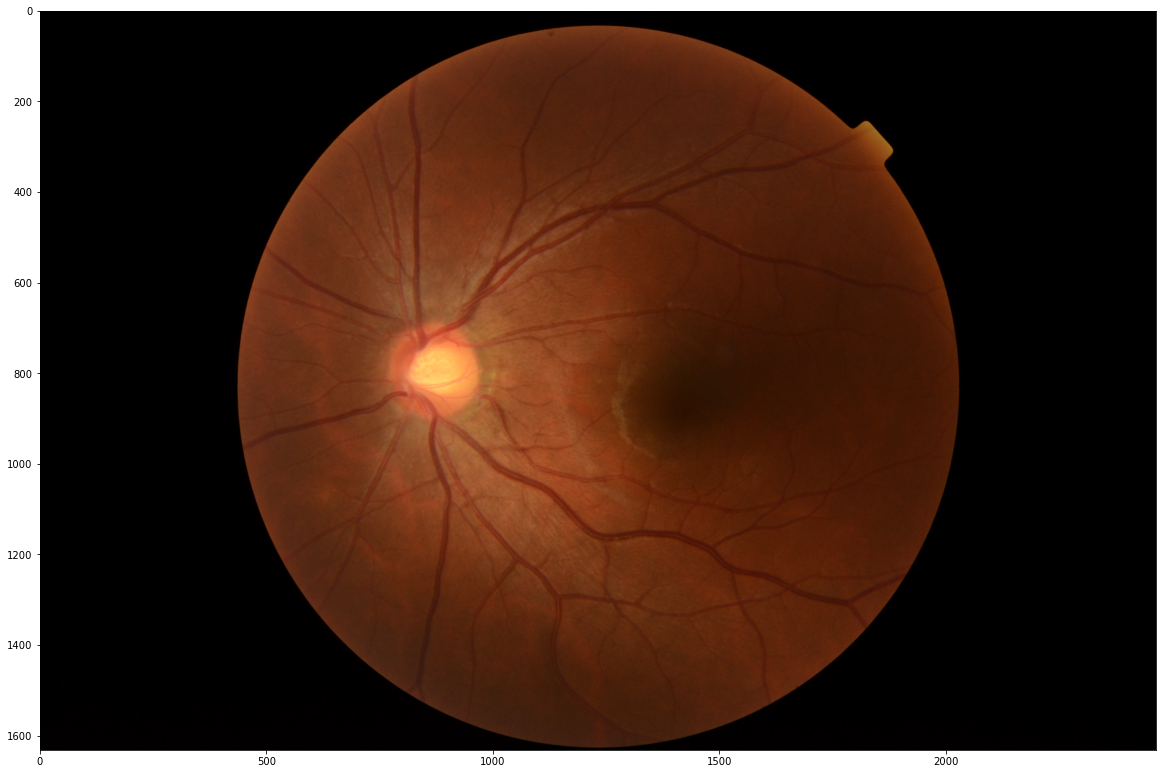

In [14]:
test_img = cv.imread('dataset/dataset/1_normal/NL_001.png')
test_img = cv.cvtColor(test_img, cv.COLOR_BGR2RGB)
show_image(test_img)

In [15]:
width, height, dimension = test_img.shape
print(f'Width RGB = {width}')
print(f'Height RGB = {height}')
print(f'Dimension RGB = {dimension}')

Width RGB = 1632
Height RGB = 2464
Dimension RGB = 3


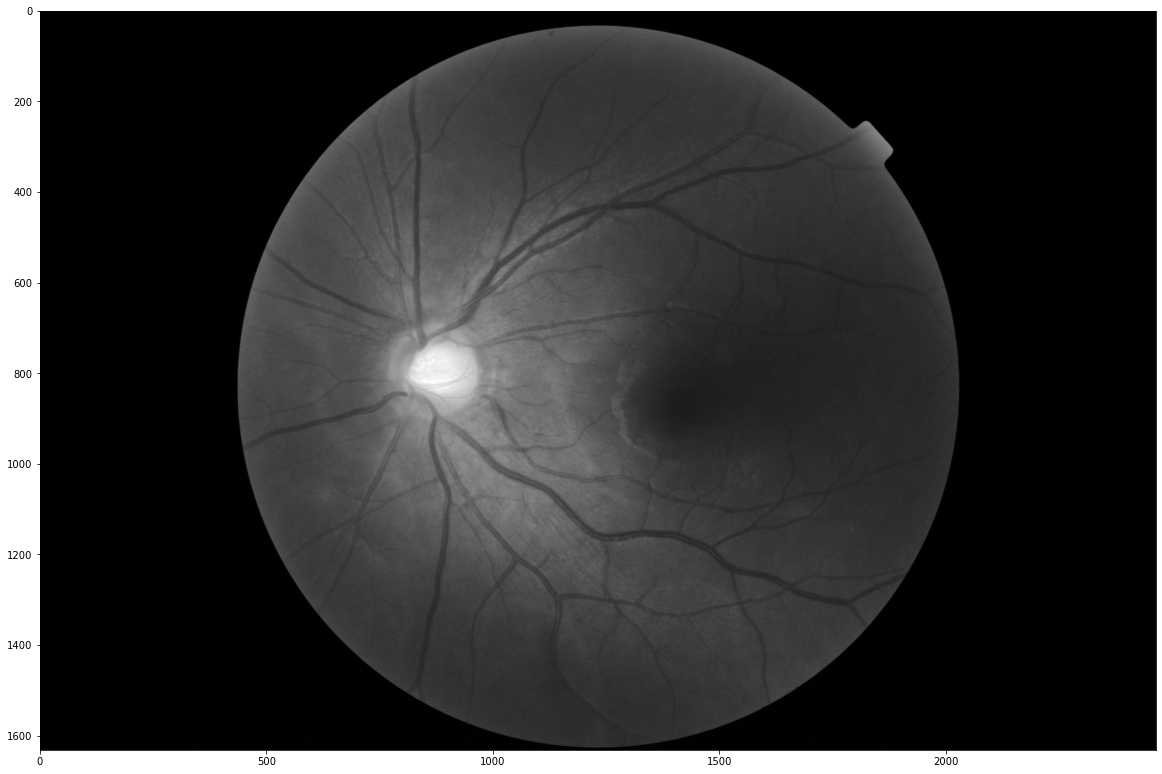

In [16]:
test_img_gray = cv.cvtColor(test_img, cv.COLOR_RGB2GRAY)
show_image(test_img_gray)

In [17]:
width, height = test_img_gray.shape
print(f'Width Grayscale = {width}')
print(f'Height Grayscale = {height}')
print(f'Image Shape Grayscale {test_img_gray.shape}')

Width Grayscale = 1632
Height Grayscale = 2464
Image Shape Grayscale (1632, 2464)


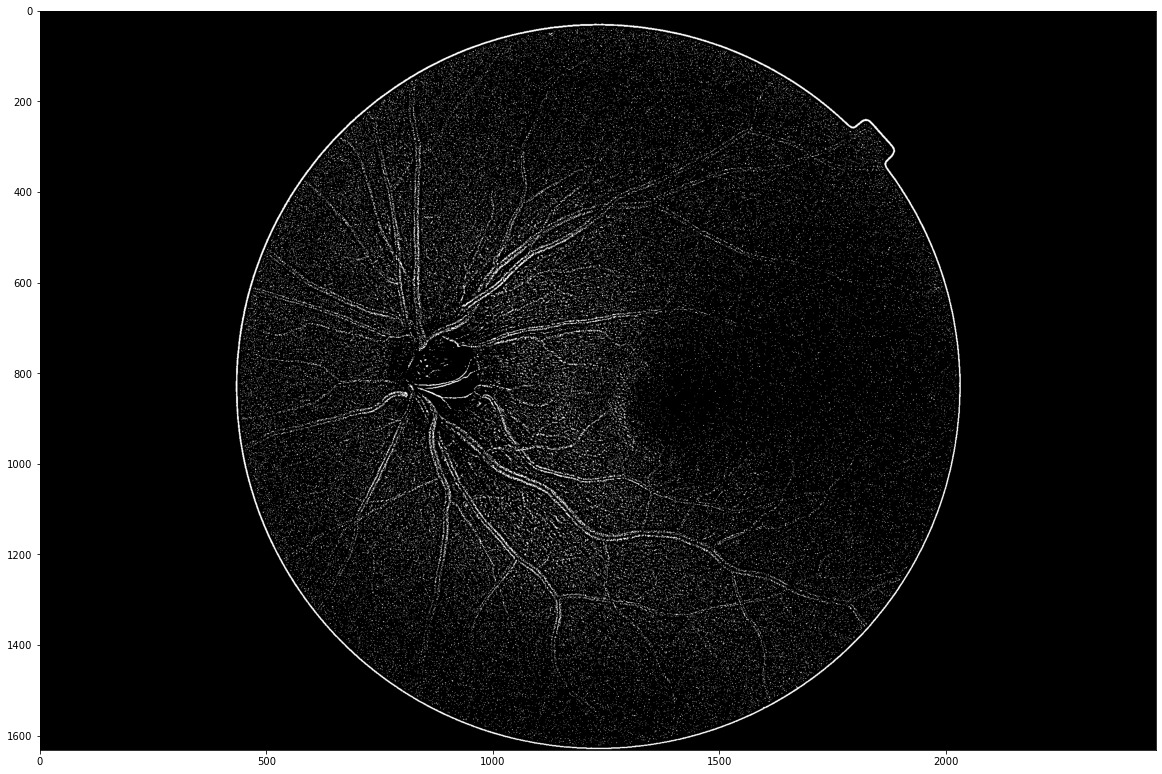

In [18]:
test_img_thresh = cv.adaptiveThreshold(test_img_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,3)
show_image(test_img_thresh)

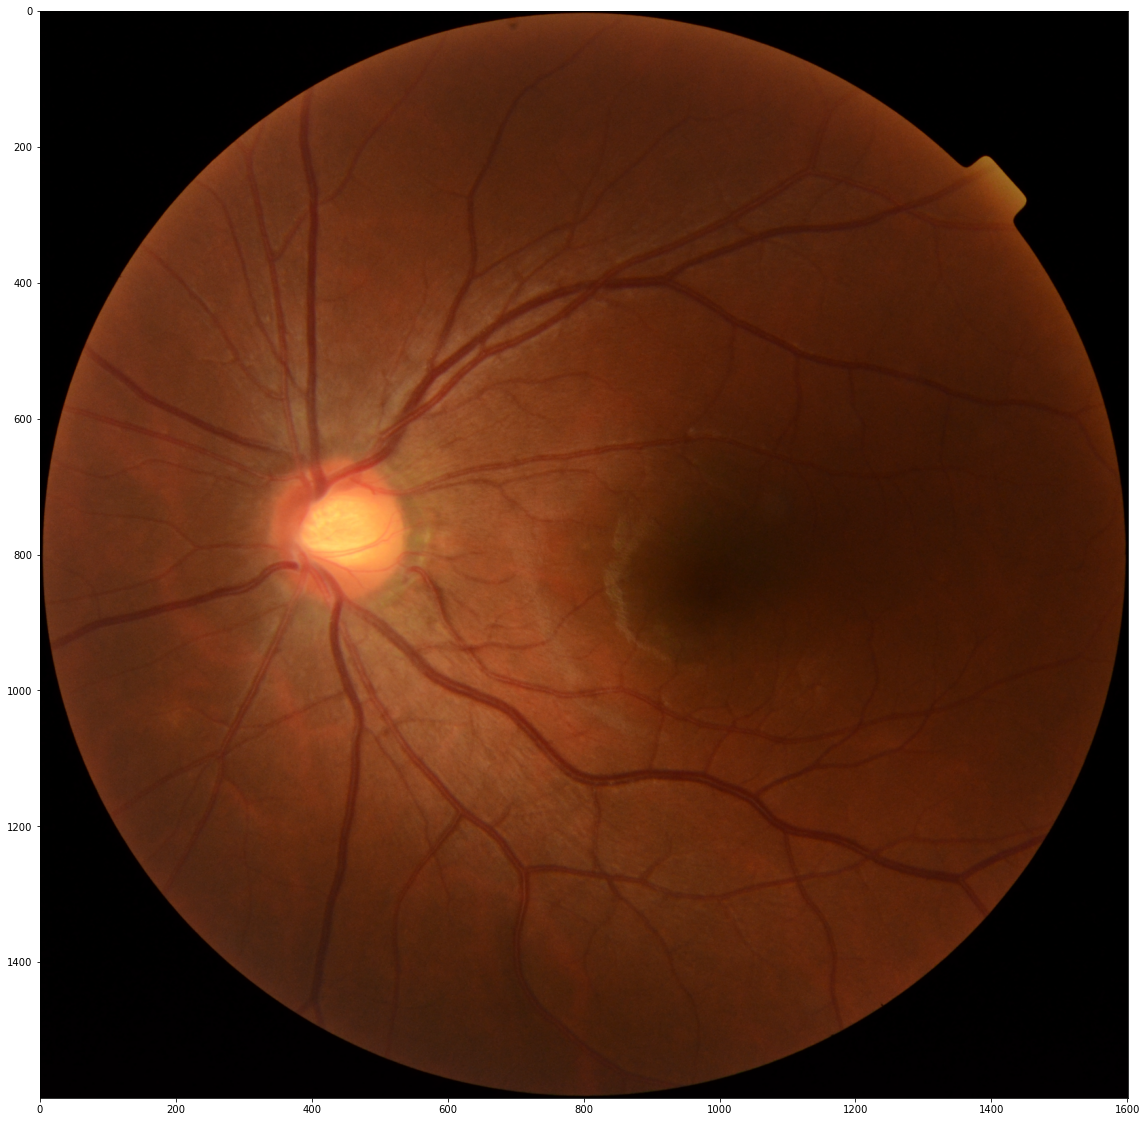

In [19]:
cnts = cv.findContours(test_img_thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv.contourArea, reverse=True)
for c in cnts:
    x,y,w,h = cv.boundingRect(c)
    test_img_ROI = test_img[y:y+h, x:x+w]
    break
show_image(test_img_ROI)

In [20]:
width, height, dimension = test_img_ROI.shape
print(f'Width = {width}')
print(f'Height = {height}')
print(f'Dimension = {dimension}')

Width = 1600
Height = 1601
Dimension = 3


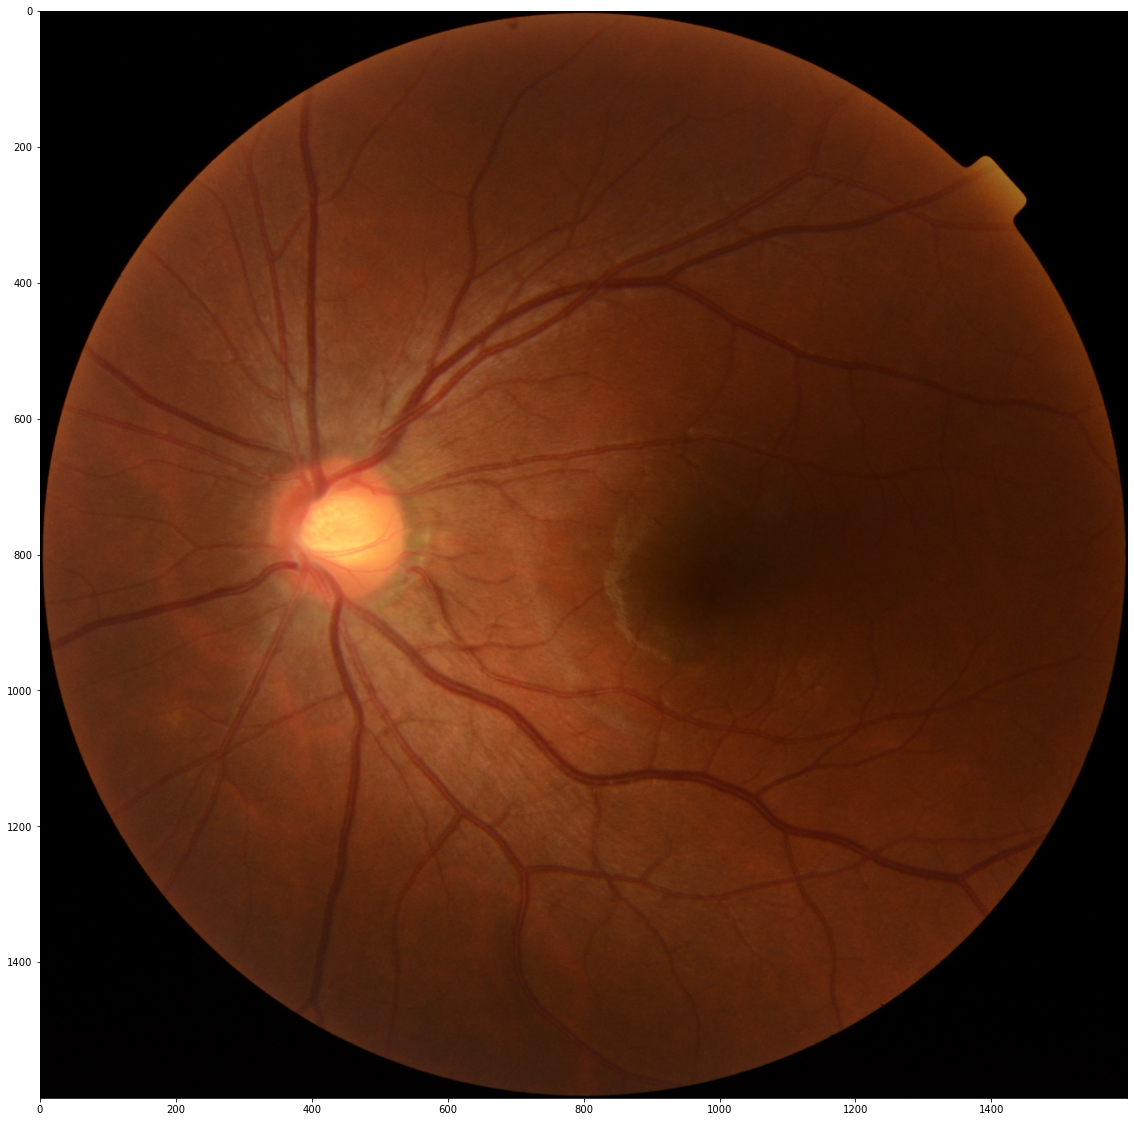

In [21]:
test_img_ROI_resize = cv.resize(test_img_ROI, (1600, 1600))
show_image(test_img_ROI_resize)

In [22]:
width, height, dimension = test_img_ROI_resize.shape
print(f'Width = {width}')
print(f'Height = {height}')
print(f'Dimension = {dimension}')

Width = 1600
Height = 1600
Dimension = 3


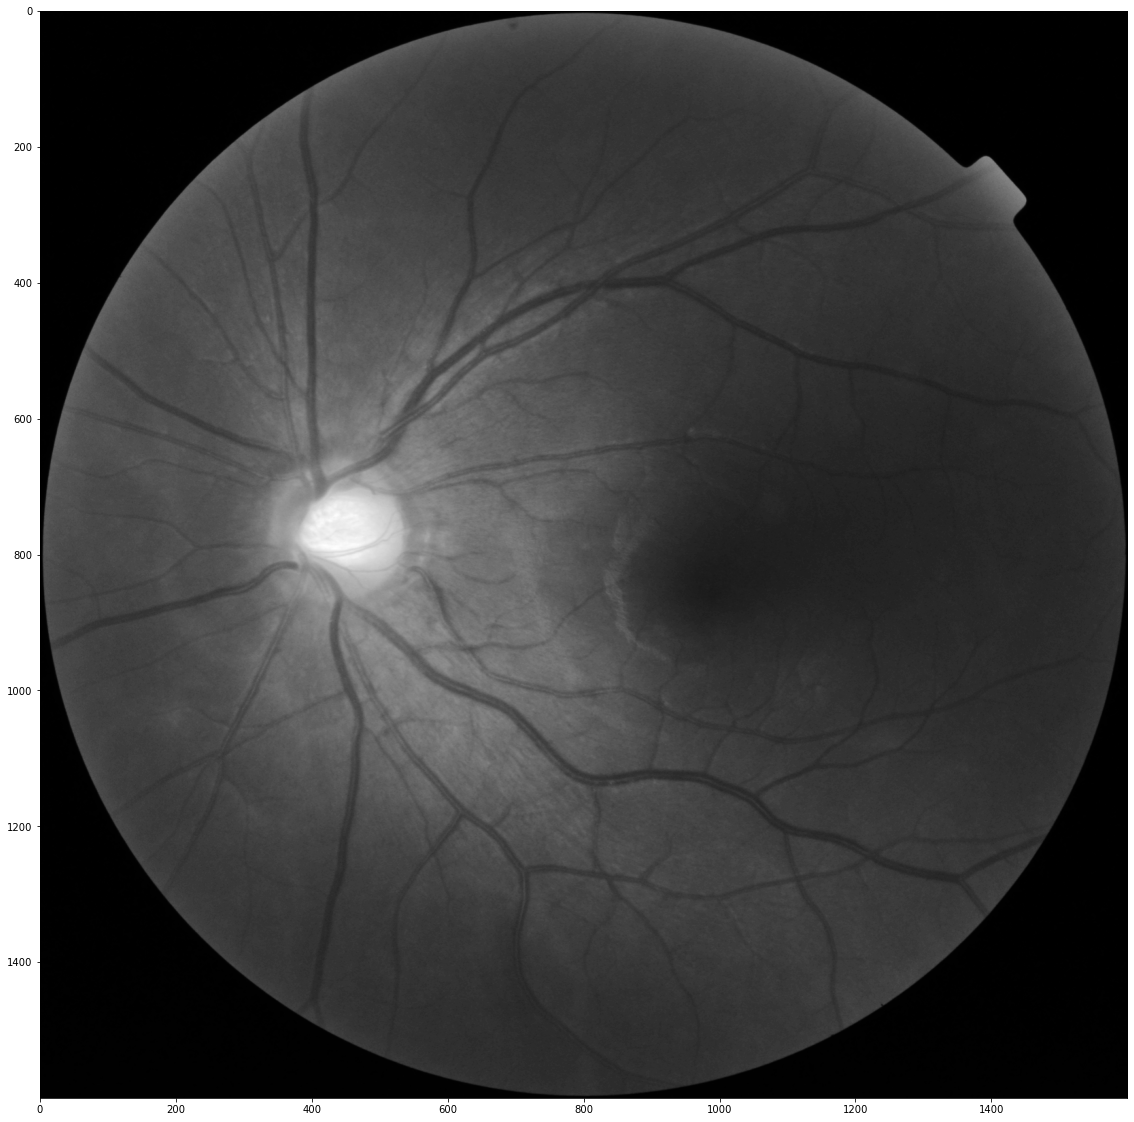

In [23]:
test_img_ROI_resize_gray = cv.cvtColor(test_img_ROI_resize, cv.COLOR_RGB2GRAY)
show_image(test_img_ROI_resize_gray)

In [24]:
def preprocessingImage(image):
    test_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    test_img_gray = cv.cvtColor(test_img, cv.COLOR_RGB2GRAY)
    test_img_thresh = cv.adaptiveThreshold(test_img_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,3)
    cnts = cv.findContours(test_img_thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = sorted(cnts, key=cv.contourArea, reverse=True)
    for c in cnts:
        x,y,w,h = cv.boundingRect(c)
        test_img_ROI = test_img[y:y+h, x:x+w]
        break
    test_img_ROI_resize = cv.resize(test_img_ROI, (width, height))
    test_img_ROI_resize_gray = cv.cvtColor(test_img_ROI_resize, cv.COLOR_RGB2GRAY)
    
    return test_img_ROI_resize_gray

In [25]:
train_normal='dataset/dataset/1_normal/'
train_cataract='dataset/dataset/2_cataract/'
train_glaucoma='dataset/dataset/2_glaucoma/'
train_retina='dataset/dataset/3_retina_disease/'

In [26]:
t_normal=[]
for file in range(1,301):
    image = cv.imread(f'{train_normal}/NL_{str(file).zfill(3)}.png')
    img = preprocessingImage(image)
    t_normal.append(img)

In [27]:
t_cataract=[]
for file in range(1,101):
    image = cv.imread(f'{train_cataract}/cataract_{str(file).zfill(3)}.png')
    img = preprocessingImage(image)
    t_cataract.append(img)

In [28]:
t_glaucoma=[]
for file in range(1, 102):
    image = cv.imread(f'{train_glaucoma}/Glaucoma_{str(file).zfill(3)}.png')
    img = preprocessingImage(image)
    t_glaucoma.append(img)

In [29]:
t_retina=[]
for file in range(1, 101):
    image = cv.imread(f'{train_retina}/Retina_{str(file).zfill(3)}.png')
    img = preprocessingImage(image)
    t_retina.append(img)

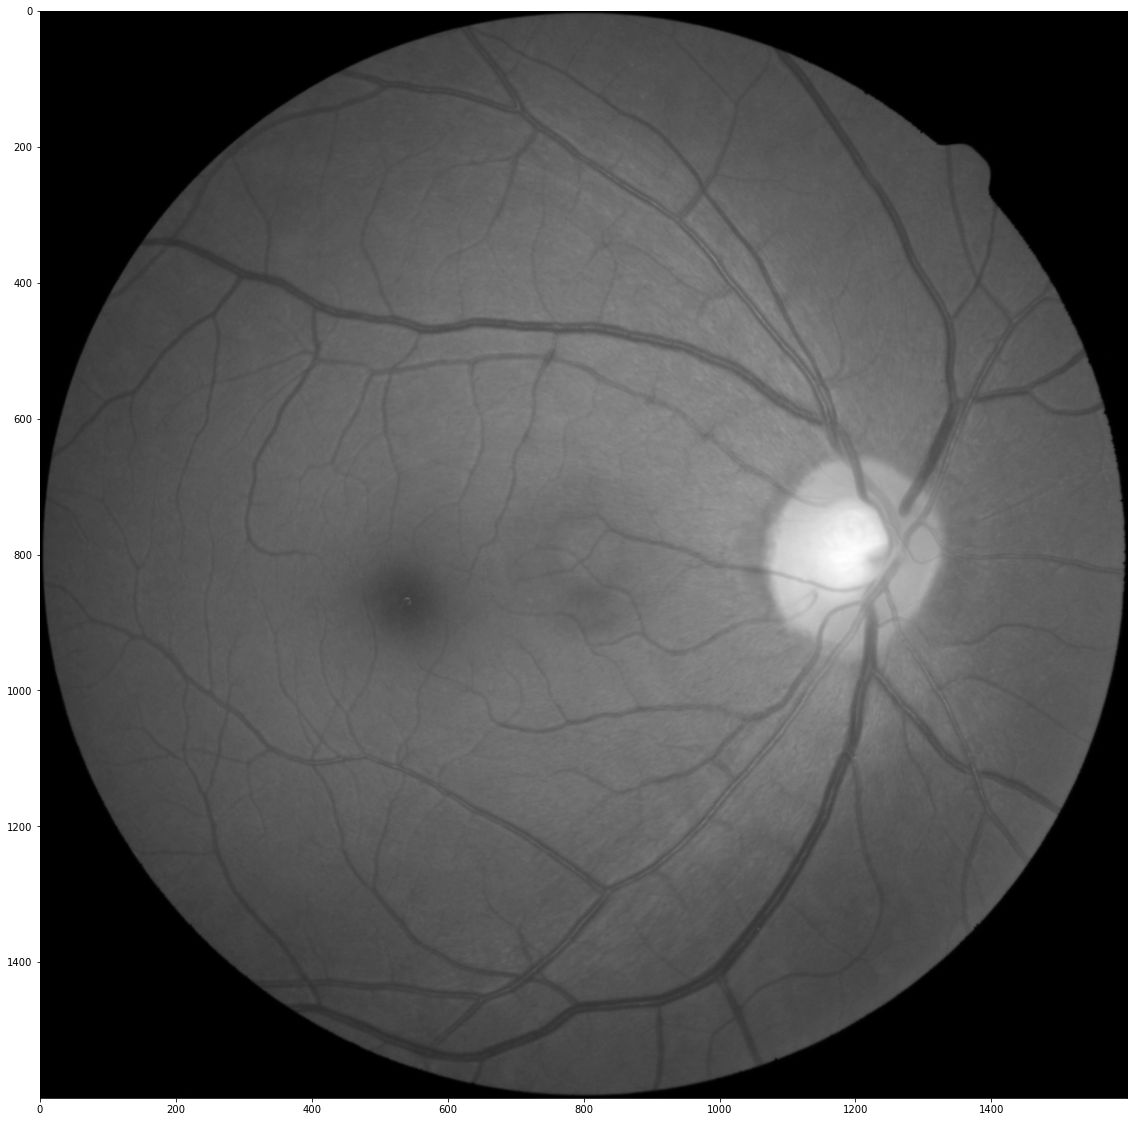

In [30]:
show_image(t_normal[290])

In [31]:
X_train=t_normal+t_retina+t_cataract+t_glaucoma

In [32]:
X_train=np.array(X_train)

In [33]:
X_train.shape

(601, 1600, 1600)

In [34]:
y_nl=[]
y_cat=[]
y_gl=[]
y_rt=[]
for i in range(1,301):
    y_nl.append(0)
for i in range(1,101):
    y_cat.append(1)
for i in range(1,102):
    y_gl.append(2)
for i in range(1,101):
    y_rt.append(3)      

In [35]:
y_train=y_nl+y_cat+y_gl+y_rt

In [36]:
y_train=np.array(y_train)
y_train.shape

(601,)

In [37]:
test_normal='dataset/repository/yiweichen04-retina_dataset-914b0f4/dataset/1_normal'
test_cataract='dataset/repository/yiweichen04-retina_dataset-914b0f4/dataset/2_cataract'
test_glaucoma='dataset/repository/yiweichen04-retina_dataset-914b0f4/dataset/2_glaucoma'
test_retina='dataset/repository/yiweichen04-retina_dataset-914b0f4/dataset/3_retina_disease'

In [38]:
normal_test=[]
for file in range(1,301):
    image = cv.imread(f'{test_normal}/NL_{str(file).zfill(3)}.png')
    img = preprocessingImage(image)
    normal_test.append(img)

In [39]:
cataract_test=[]
for file in range(1,101):
    image = cv.imread(f'{test_cataract}/cataract_{str(file).zfill(3)}.png')
    img = preprocessingImage(image)
    cataract_test.append(img)

In [40]:
glaucoma_test=[]
for file in range(1, 102):
    image = cv.imread(f'{test_glaucoma}/Glaucoma_{str(file).zfill(3)}.png')
    img = preprocessingImage(image)
    glaucoma_test.append(img)

In [41]:
retina_test=[]
for file in range(1, 101):
    image = cv.imread(f'{test_retina}/Retina_{str(file).zfill(3)}.png')
    img = preprocessingImage(image)
    retina_test.append(img)

In [42]:
nt=normal_test[1:101]
ct=cataract_test[1:31]
gl=glaucoma_test[1:31]
rt=retina_test[1:31]

In [43]:
X_test=nt+ct+gl+rt

In [44]:
X_test=np.array(X_test)
X_test.shape

(190, 1600, 1600)

In [45]:
nl=[]
cat=[]
glu=[]
rte=[]
for i in range(1,101):
    nl.append(0)
for i in range(1,31):
    cat.append(1)
for i in range(1,31):
    glu.append(2)
for i in range(1,31):
    rte.append(3)   

In [46]:
y_test=nl+cat+glu+rte

In [47]:
y_test=np.array(y_test)
y_test.shape

(190,)

In [48]:
classifier=Sequential()

classifier.add(Conv2D(3,(227,227),input_shape=(1600,1600,1),activation ='relu')) #Layer 1
#classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Conv2D(96,(55,55),activation ='relu')) #Layer 2
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Conv2D(96,(27,27),activation ='relu')) #Layer 3
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Conv2D(256,(13,13),activation ='relu')) #Layer 4
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Conv2D(256,(6,6),activation ='relu')) #Layer 5
classifier.add(MaxPooling2D(pool_size=(4,4)))

classifier.add(Flatten())
classifier.add(Dropout(0.2))

classifier.add(Dense(units=256,activation='relu'))
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=64,activation='relu'))
classifier.add(Dense(units=32,activation='relu'))
classifier.add(Dense(units=16,activation='relu'))
classifier.add(Dense(units=4,activation='softmax'))

In [49]:
classifier.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [42]:
#classifier.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=1,validation_split=0.2)